In [171]:
import numpy as np
import matplotlib.pyplot as plt
import sdeint

In [172]:
class BeatBoxModel:
    def __init__(self, f, d, vd, cl, ta_mu, ta_sigma, noise_sigma, noise_a, noise_l):
        self.f = f
        self.d = d
        self.vd = vd
        self.cl = cl
        self.ta = np.random.lognormal(ta_mu, ta_sigma)
        self.ra = self.d/self.ta
        self.ke = self.cl/self.vd

        self.noise_sigma = noise_sigma
        self.noise_a = noise_a
        self.noise_l = noise_l

    def _sample_before_ta(self, t=np.linspace(0, 100, 1000)):
        t_before = t[t <= self.ta]
        c = self.f * self.ra / self.cl * (1 - np.exp(- self.ke * t_before))
        return c

    def _sample_after_ta(self, t=np.linspace(0, 100, 1000)):
        t_after = t[t > self.ta]
        c = self.f*self.ra/self.cl * \
            (1-np.exp(-self.ke*self.ta))*np.exp(-self.ke * (t_after-self.ta))
        return c

    def sample(self, t=np.linspace(0, 100, 1000)):
        c_before = self._sample_before_ta(t)
        c_after = self._sample_after_ta(t)
        return np.concatenate((c_before, c_after))

    def noise(self, t):
        N = len(t)

        def sample_wiener(t):
            return sdeint.itoint(lambda x, t: 0, lambda x, t: 1, 0, t)

        W = sample_wiener(t).reshape((-1))
        J = np.random.poisson(self.noise_l, size=N).cumsum()
        X = self.noise_sigma * W + self.noise_a * t
        X_t = X + J
        return X_t

    def sample_with_noise(self, t=np.linspace(0, 100, 1000)):
        return self.sample(t) + self.noise(t)

In [173]:
model = BeatBoxModel(1, 1, 1, 1, 1, 1, 0.005, 0.0001, 0.00001)

In [174]:
t = np.linspace(0, 100, 1000)

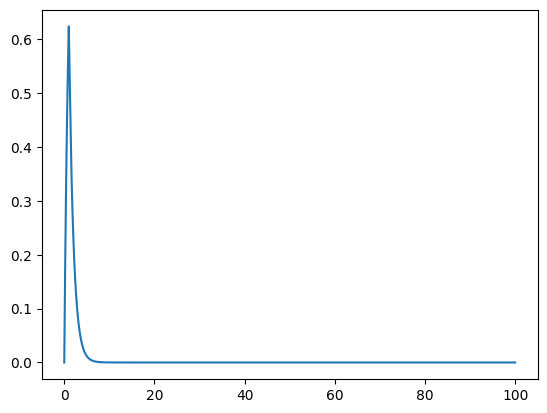

In [175]:
c = model.sample(t)
plt.plot(t, c)

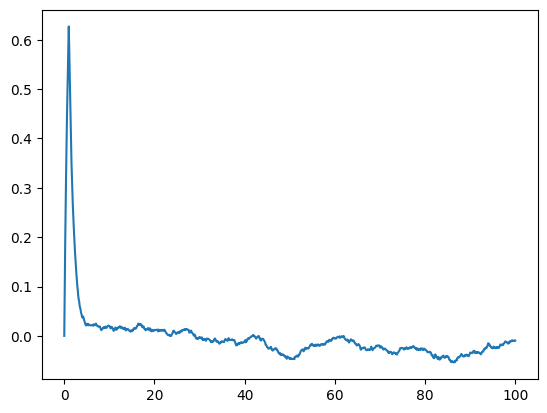

In [176]:
c = model.sample_with_noise(t)
plt.plot(t, c)